# Práctica 3
# Análisis de Señales Bioeléctricas

In [1]:
'''
Código de la práctica 3
21/10/19
'''
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as Sig
from scipy.stats import pearsonr as r
from scipy.signal import coherence as ch
from numpy.fft import fft as fft

In [2]:
def graf(signal, x=np.array([]), title='', xaxis='', yaxis='' ):
    plt.figure( figsize=(12,6) )
    if x.shape[0] > 1:
        plt.plot( x, signal, color='mediumvioletred' )
    else:
        plt.plot( signal, color='mediumvioletred' )
        
    plt.title( title, color='blue', size=25 )
    plt.xlabel( xaxis, color='darkorange', size=18 )
    plt.ylabel( yaxis, color='limegreen', size=18 )
    plt.xticks(size=15,color='w')
    plt.yticks(size=15,color='w')
    plt.grid()

In [3]:
def escala1(signal):
    signal = np.array(signal)
    signal = 2*signal / np.ptp(signal)
    signal -= (signal.max()-1)
    return signal

In [4]:
def zscore(signal):
    return ( signal - signal.mean( axis=0 ) ) / signal.std(axis=0)

In [5]:
def relacion(signal1, signal2):
    rel = r(signal1, signal2)[0]
    if rel > .8:
        print('Pues si hay una correlación, felicidades! \nCorr = ', rel)
    else:
        print('No hay nada, no se sabe qué está pasando \nCorr = ', rel, '\n\n\n\n\n\n\n\n\n\n\nHuye!!!!!')
    return rel

In [6]:
def histogram(s, nbins=10, width=.5, title='Histograma'):
    intervals = np.linspace( s.min(), s.max(), nbins+1 )
    
    left = s[:,np.newaxis] > intervals[:-1][np.newaxis]
    right = s[:,np.newaxis] < intervals[1:][np.newaxis]
    
    hist = (left*right).sum(axis=0)
    plt.bar(intervals[:-1], hist, width, color='teal')
    plt.grid()
    plt.title(title, size=10, color='lightcoral')
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.show()
    
    return intervals[:-1], hist

In [7]:
def coherencia(x, y, sr=1000):
    ft,  Sxy = Sig.csd( x,y, fs=sr )
    fx, Sx = Sig.welch( x, fs=sr )
    fy, Sy = Sig.welch( y, fs=sr )
    
    cohe = np.power(Sxy, 2) / ( Sx*Sy )
    
    return ft, np.abs(cohe)

In [8]:
def picos( signal, umbral=0,sr=1000 ):
    peaks, _ = Sig.find_peaks( signal, height=umbral )
    
    frec = peaks.shape[0] * sr / signal.shape[0] 
    
    ### Grafica
    plt.figure( figsize=(12,6) )
    plt.plot(signal, color='dodgerblue' )
    plt.plot( peaks, signal[peaks], 'x', color='deeppink' )
    plt.xticks(color='w', size=15)
    plt.yticks(color='w', size=15)
    plt.grid()
    
    return frec

['PO2', 'EMG', 'EKG', 'RSP', 'PUL', 'sr']
1000


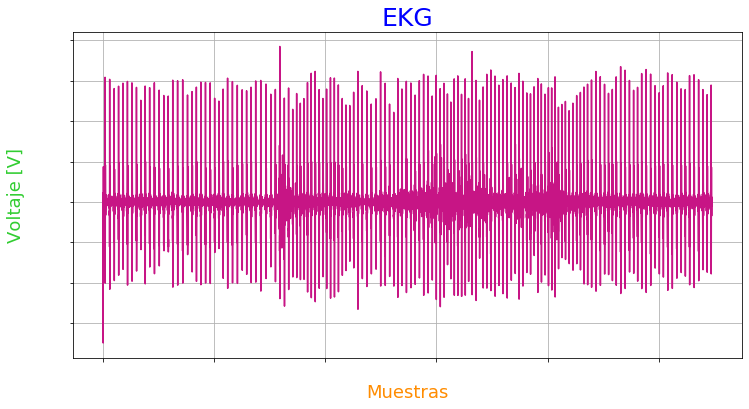

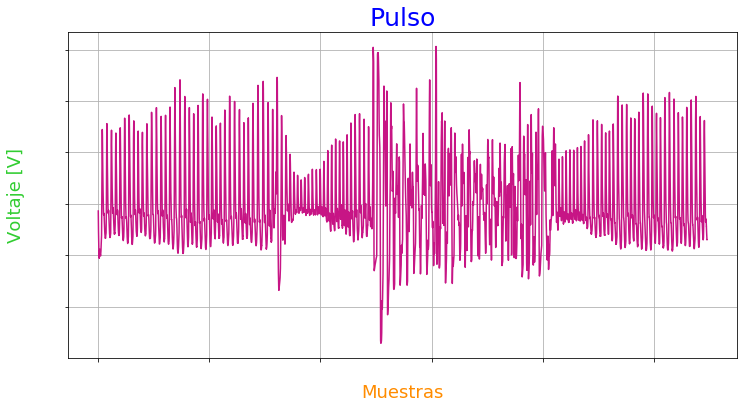

In [9]:
# Los registros ya estan acondicionados
signals = np.load('/home/edu/Documentos/GitHub/MCIB-19-P-Edu/data/P3/A2_1_f.npz')

print([*signals])

EKG = signals['EKG']
EMG = signals['EMG']
RESP = signals['RSP']
PL = signals['PUL']
PO2 = signals['PO2']
sr = signals['sr']

print(sr)
graf(EKG, xaxis='Muestras', yaxis='Voltaje [V]', title='EKG')
graf(PL, xaxis='Muestras', yaxis='Voltaje [V]', title='Pulso')

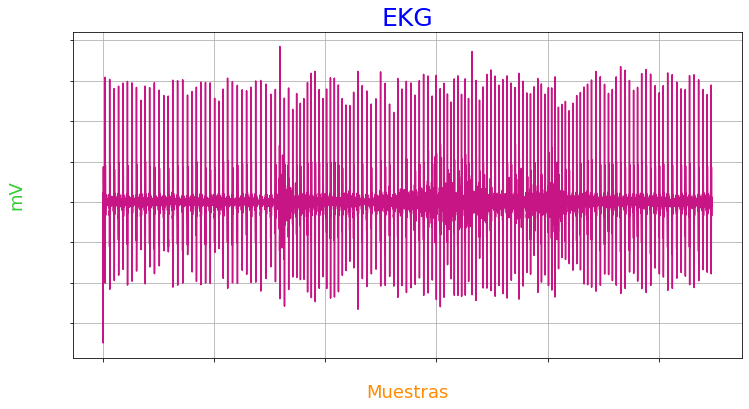

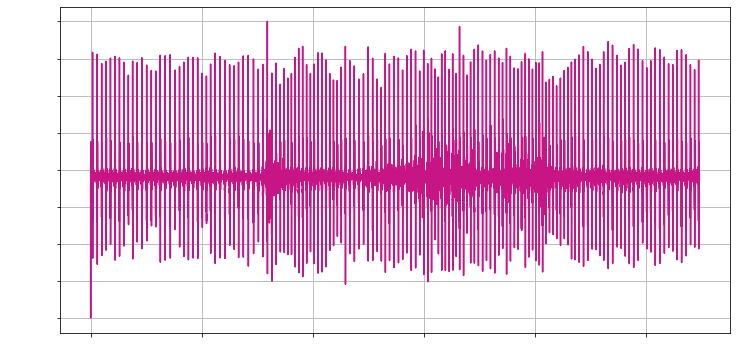

In [10]:
graf(EKG,np.linspace( 0,EKG.shape[0]/200, EKG.shape[0]  ),
     title='EKG', xaxis='Muestras', yaxis='mV')

graf(escala1(EKG))

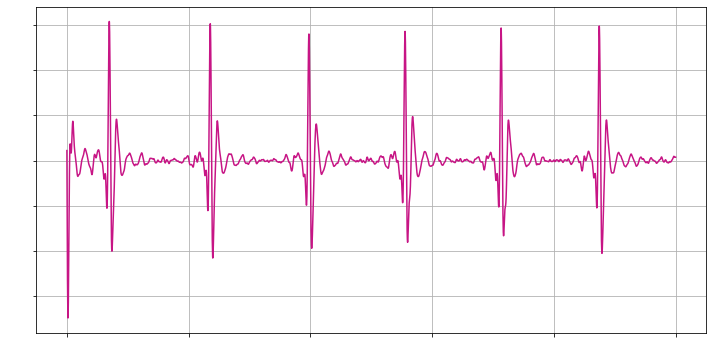

In [18]:
zEKG = zscore(EKG)
graf(zEKG[:5000])

In [19]:
co = relacion(EKG,PL)

No hay nada, no se sabe qué está pasando 
Corr =  5.826722117939701e-05 










Huye!!!!!


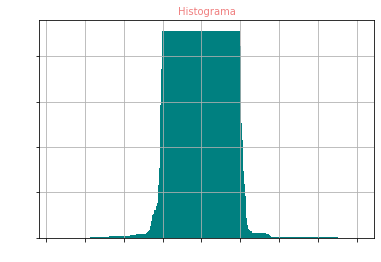

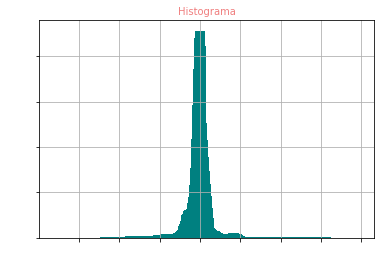

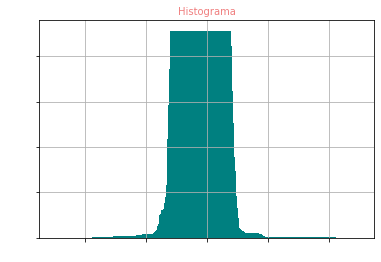

In [13]:
histogram(EKG, nbins=np.sqrt(EKG.shape[0]))
histogram(zEKG, nbins=np.sqrt(EKG.shape[0]))
espacios, valores = histogram(escala1(EKG), nbins=np.sqrt(EKG.shape[0]))

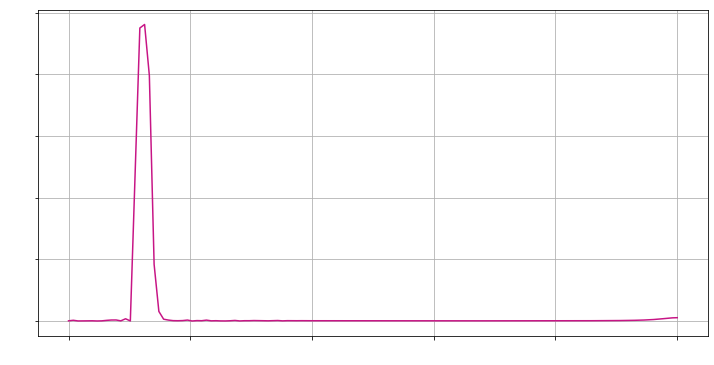

In [14]:
f, Cxy = ch(EKG, EMG) 
t = np.linspace( 0, Cxy.shape[0]/1000, Cxy.shape[0] )
graf( Cxy,x=f*1000 )

(129,)


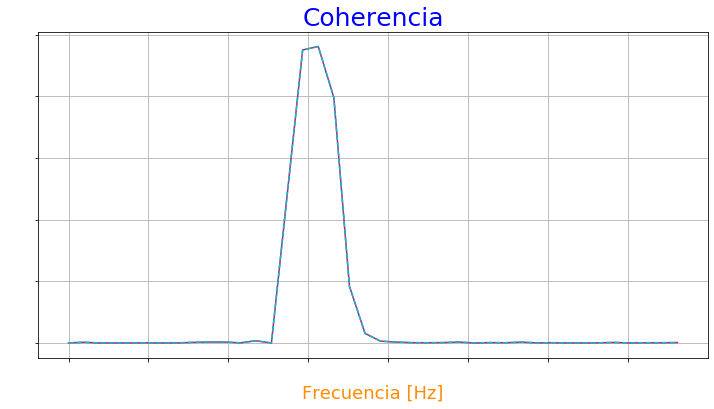

In [15]:
ft, C = coherencia(EKG, EMG)
w = np.linspace( 0, 500, EMG.shape[0]//2 )/1000

print( C.shape )
graf( C[:40], ft[:40], title='Coherencia', xaxis='Frecuencia [Hz]' )
a = plt.plot( f[:40]*1000, Cxy[:40], '--c' )


La frecuencia latido a latido es de 1.3333333333333333 Hz


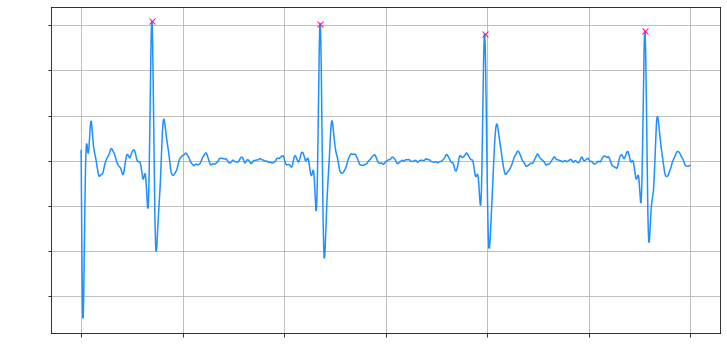

In [16]:
frec = picos( EKG[:3000], .4 )
print( 'La frecuencia latido a latido es de {} Hz'.format(frec) )